## Feature Engineering - Dates

- project_phase_actual_start_date
- project_phase_planned_end_date
- project_phase_actual_end_date

### Stuff to do:

- Group by month.
- Finding `Expected End - Start`. Finding the project length. 
- Finding `Expented End - Start` compared to the project cost.
- Finding `Expended Project End Date - Actual Project End Date`. To see if actual project end date is after the estimated end date. Percentage of planned duration.

### What to do with this data

- Graph it
- Calculate the correlation

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

In [66]:
# We will get the non-date values, marking them as NaT

# Keep a copy of the original column 
df['original_project_phase_planned_end_date'] = df['project_phase_planned_end_date']

# Convert the 'project_phase_planned_end_date' to datetime, make all errors as NaT (Not a Time)
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')

# Extract the original non-date values
non_date_values = df[df['project_phase_planned_end_date'].isna()]['original_project_phase_planned_end_date']

# Display the unique non-date values
unique_non_date_values = non_date_values.unique()
print(unique_non_date_values)



['PNS' 'F&E' 'DOES' 'IEH' 'DOEL' 'DOER' 'FTK' 'EMER' 'DOEP' '/  /']


We see that there are a number of non-date values in the date column. 

These values are:
- PNS
- F&E
- DOES
- IEH
- DOEL
- DOER
- FTK
- EMER
- DOEP

### Calculate: (Arithmetic) Difference between Start and Planned End Date (Theoretical Project Length)

In [67]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_planned_end_date' and 'project_phase_actual_start_date' to datetime
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')

# Calculate the difference and create the new column 'Expected End - Start'
df['Expected End - Start'] = df['project_phase_planned_end_date'] - df['project_phase_actual_start_date']

# Remove the NaN entries
df = df.dropna(subset=['Expected End - Start'])

# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,Expected End - Start
0,0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,2016-07-07,2018-03-28,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False,629 days
1,1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,2016-07-07,2018-03-28,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210",False,629 days
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27,2017-11-27,08/03/2017,0,1792.0,1792.0,DSF: 0000823560,False,123 days
3,3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,2017-08-04,2018-02-05,NaN,19110,17318.0,7169.0,DSF: 0000823560,True,185 days
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,2018-01-15,09/14/2017,50000,49625.0,49625.0,DSF: 0000844624,False,245 days


### Calculate: (Arithmetic) Difference between Start and Actual End Date (Actual Project Length)

In [68]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_actual_end_date' and 'project_phase_actual_start_date' to datetime
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')

# Calculate the difference and create the new column 'Expected End - Start'
df['Actual End - Start'] = df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']

# Remove the NaN entries
df = df.dropna(subset=['Actual End - Start'])

# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,Actual End - Start
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27,11/27/2017,2017-08-03,0,1792.0,1792.0,DSF: 0000823560,False,7 days
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,01/15/2018,2017-09-14,50000,49625.0,49625.0,DSF: 0000844624,False,122 days
7,7,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,01/15/2018,2017-09-14,76250,75677.0,75677.0,DSF: 0000845571,False,122 days
8,8,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Scope,Complete,2016-08-02,12/19/2016,2017-02-13,36881,57074.0,56288.0,"DSF: 0000820035, 0000866151",False,195 days
9,9,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Design,Complete,2017-05-15,10/16/2017,2017-12-18,141246,183396.0,180358.0,"DSF: 0000820035, 0000866151",False,217 days


### Calculate: (Arithmetic) Difference between Expended Project End Date and Actual Project End Date (Time Late)

In [69]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_actual_end_date' and 'project_phase_planned_end_date' to datetime
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')

# Calculate the difference and create the new column 'Expected End - Start'
df['Actual End - Expected End'] =  df['project_phase_actual_end_date'] - df['project_phase_planned_end_date']

# Remove the NaN entries
df = df.dropna(subset=['Actual End - Expected End'])

# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,Actual End - Expected End
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,2017-11-27,2017-08-03,0,1792.0,1792.0,DSF: 0000823560,False,-116 days
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,05/15/2017,2018-01-15,2017-09-14,50000,49625.0,49625.0,DSF: 0000844624,False,-123 days
7,7,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,05/15/2017,2018-01-15,2017-09-14,76250,75677.0,75677.0,DSF: 0000845571,False,-123 days
8,8,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Scope,Complete,08/02/2016,2016-12-19,2017-02-13,36881,57074.0,56288.0,"DSF: 0000820035, 0000866151",False,56 days
9,9,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Design,Complete,05/15/2017,2017-10-16,2017-12-18,141246,183396.0,180358.0,"DSF: 0000820035, 0000866151",False,63 days


### Calculate: (Percentage) Difference between Actual Project Length and Expected Project Length -> (Actual End - Start) / (Expected End - Start)

In [70]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_actual_end_date' and 'project_phase_planned_end_date' to datetime
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_planned_end_date'])
df = df.dropna(subset=['project_phase_actual_end_date'])
df = df.dropna(subset=['project_phase_actual_start_date'])

# Calculate the percentage difference and create the new column 'Expected End / Start'
df['(Actual End - Start) / (Expected End - Start)'] =  (df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']) / (df['project_phase_planned_end_date'] - df['project_phase_actual_start_date']) * 100


# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,(Actual End - Start) / (Expected End - Start)
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27,2017-11-27,2017-08-03,0,1792.0,1792.0,DSF: 0000823560,False,5.691057
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,2018-01-15,2017-09-14,50000,49625.0,49625.0,DSF: 0000844624,False,49.795918
7,7,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,2018-01-15,2017-09-14,76250,75677.0,75677.0,DSF: 0000845571,False,49.795918
8,8,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Scope,Complete,2016-08-02,2016-12-19,2017-02-13,36881,57074.0,56288.0,"DSF: 0000820035, 0000866151",False,140.287770
9,9,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Design,Complete,2017-05-15,2017-10-16,2017-12-18,141246,183396.0,180358.0,"DSF: 0000820035, 0000866151",False,140.909091


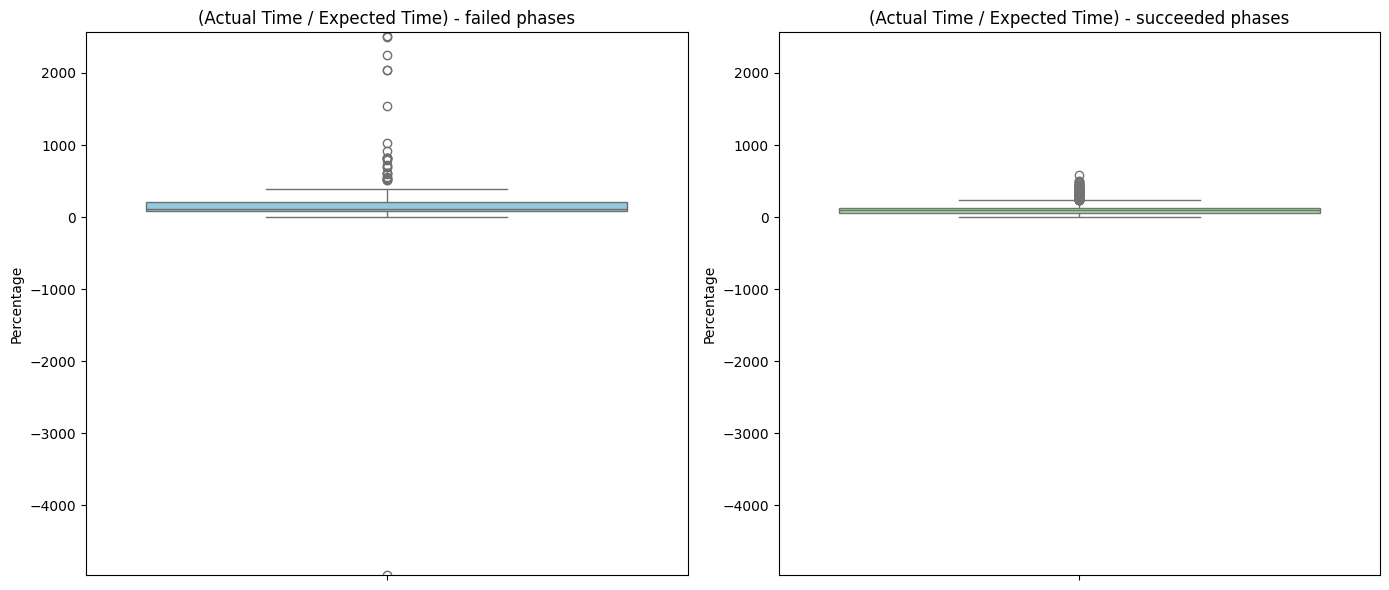

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from the URL
url = 'https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv'
df = pd.read_csv(url)

# Convert the necessary columns to datetime
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_actual_end_date', 'project_phase_actual_start_date', 'project_phase_planned_end_date'])

# Calculate the percentage difference and create the new column 'Expected End / Start'
df['time_percentage'] = ((df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']) / 
                         (df['project_phase_planned_end_date'] - df['project_phase_actual_start_date'])) * 100

# Replace infinite values with NaN and then drop them
df['time_percentage'] = df['time_percentage'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['time_percentage'])

# Separate the data into failed and succeeded phases
failed_phases = df[df['failure'] == True]
succeeded_phases = df[df['failure'] == False]

# Determine the common y-axis limits
y_min = min(failed_phases['time_percentage'].min(), succeeded_phases['time_percentage'].min())
y_max = max(failed_phases['time_percentage'].max(), succeeded_phases['time_percentage'].max()) + 50

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for 'time_percentage' of failed phases
sns.boxplot(y=failed_phases['time_percentage'], color='skyblue', ax=axes[0])
axes[0].set_title('(Actual Time / Expected Time) - failed phases')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(y_min, y_max)

# Box plot for 'time_percentage' of succeeded phases
sns.boxplot(y=succeeded_phases['time_percentage'], color='lightgreen', ax=axes[1])
axes[1].set_title('(Actual Time / Expected Time) - succeeded phases')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(y_min, y_max)

# Display the plots
plt.tight_layout()
plt.show()
